In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm



In the following code, a class "Euler" is defined. This object contains all the needed information of an Euler or leapfrog integrated Orbit. It is initialised by a starting vector r0, the initial velocity v0, the time stepsize h and the number of steps. 

The Class  contains functions to integrate the orbit from those values using the euler method, and the leapfrog method, as indicated in the code below.

In [2]:

class Euler():
    
    #Function initializes object, normalises r0,v0 to s0, w0 (see script page 6)
    def __init__(self, r_0, v_0, h, steps, threed=False):
        self.s_0 = np.array(r_0 / norm(r_0))
        self.w_0 = np.array(v_0 / np.sqrt(1 / norm(r_0)))
        self.h = h
        self.location = [self.s_0]
        self.velocity = [self.w_0]
        self.energies = [1 / 4 * norm(self.w_0) ** 2 - 1 / norm(self.s_0)]
        self.steps = steps 
        
        self.y_location = []
        self.x_location = []
        self.z_location = []
        self.threed = threed#if true, the object will contain information in 3d
        self.rel_Error = []

    def loc(self, i):#function for add
        location_i = self.location[i - 1] + (self.velocity[i - 1] * self.h)
        self.location.append(location_i)
        
    def loc_leap(self, i):
        location_i = self.location[-1] + (self.velocity[-1] * self.h)
        self.location.append(location_i)
        
    def vel(self, i):
        velocity_i =  self.velocity[i - 1] - ((self.location[i - 1] / norm(self.location[i - 1]) ** 3) * self.h)
        self.velocity.append(velocity_i)
        
    def vel_half(self, i):
        velocity_i =  self.velocity[i - 1] - ((self.location[i - 1] / norm(self.location[i - 1]) ** 3) * self.h*0.5)
        self.velocity.append(velocity_i)

    def energy(self, i):
        e =  1 / 4 * norm(self.velocity[i]) ** 2 - 1 / norm(self.location[i])
        self.energies.append(e)

    def split(self):
        if self.threed == False:
            for location in self.location:
                self.x_location.append(location[0])
                self.y_location.append(location[1])
        else:
            for location in self.location:
                self.x_location.append(location[0])
                self.y_location.append(location[1])
                self.z_location.append(location[2])

    def calc_rel_Error(self, i):
        rel_E_i = np.abs((self.energies[0] - self.energies[i])/self.energies[0])
        self.rel_Error.append(rel_E_i)
            
    def calc(self):
        for i in range(1, self.steps):
            loc = self.loc(i)
            self.vel(i)
            self.energy(i)
            self.calc_rel_Error(i)
            
        self.split()
        
    def calc_leap(self):
        for i in range(1, self.steps):
            if i == 1:
                self.vel_half(i)
            else:
                self.vel(i)
            self.loc_leap(i)
            self.energy(i)
            self.calc_rel_Error(i)
        self.split()



## Part 1: Euler Integration

#### 1.1: Orbits with three different eccentricities
First, the two body problem was integrated using three different initial velocities, the result is shown in the following figure.
blabla manchmal brechen sie aus, liegt es an fehler der euler funktion?



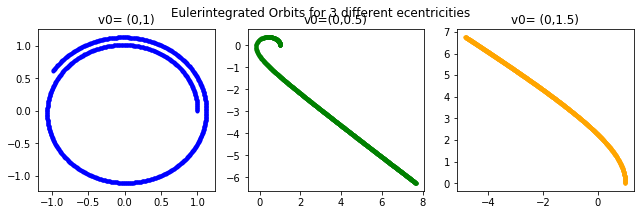

In [3]:


fig=plt.figure(figsize=(9,3))
fig.suptitle("Eulerintegrated Orbits for 3 different ecentricities")

ax1=plt.subplot(1,3,1)
ax1.set_title("v0= (0,1)")
C = Euler([1, 0], [0,1], 0.01, 1000, threed=False)
C.calc()
ax1.scatter(C.x_location, C.y_location, c="blue", cmap='RdYlGn_r', marker=".")


ax2=plt.subplot(1,3,2)
ax2.set_title("v0=(0,0.5)")
A = Euler([1, 0], [0,0.5], 0.01, 1000, threed=False)
A.calc()
ax2.scatter(A.x_location, A.y_location, c="green", cmap='RdYlGn_r', marker=".")


ax3=plt.subplot(1,3,3)
ax3.set_title("v0= (0,1.5)")
B = Euler([1, 0], [0,1.5], 0.01, 1000, threed=False)
B.calc()
ax3.scatter(B.x_location, B.y_location, c="orange", cmap='RdYlGn_r', marker=".")

plt.tight_layout()
p = 3

#### 1.2 The effect of using different time Step sizes
Now we look at the effect the size of the time steps has on the orbit.
First we created 4  Orbits using the Eulermethod of intergration. The color of the orbit is mapped to the relative energy error of the calculation. As expected, in all 4 set ups, the Energy error gets bigger and bigger with time, represented by the darkening red colour. 

All 4 orbits are supposed to be circular, as their initial verlocity of v0=(0,1) is perpendicular to s0 (as discussed in tutorial)

As you can see below, the deformation of the orbits beause of the error of the Euler Integration is most pronounced in the bigger stepsizes,as one might expect.The smaller the time steps, the less the orbit differs from a circle. For the smallest stepsize, the orbit almost looks perfectly circular, the unwanted "spiralisation" of the orbit is much smaller.


p is {{p}}

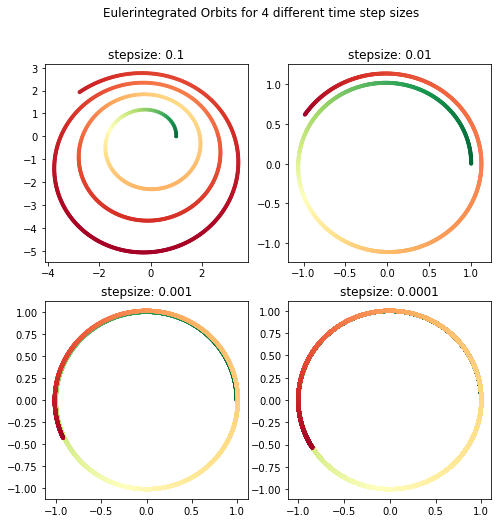

In [4]:
fig =plt.figure(figsize=(8,8))
fig.suptitle("Eulerintegrated Orbits for 4 different time step sizes")
ax1=plt.subplot(2,2,1)
ax1.set_title("stepsize: 0.1")
C = Euler([1, 0], [0,1], 0.1, 1000, threed=False)
C.calc()
ax1.scatter(C.x_location, C.y_location, c=C.energies, cmap='RdYlGn_r', marker=".")


ax2=plt.subplot(2,2,2)
ax2.set_title("stepsize: 0.01")
A = Euler([1, 0], [0,1], 0.01, 1000, threed=False)
A.calc()
ax2.scatter(A.x_location, A.y_location, c=A.energies, cmap='RdYlGn_r', marker=".")


ax3=plt.subplot(2,2,3)
ax3.set_title("stepsize: 0.001")
B = Euler([1, 0], [0,1], 0.001, 10000, threed=False)
B.calc()
ax3.scatter(B.x_location, B.y_location, c=B.energies, cmap='RdYlGn_r', marker=".")

ax4 =plt.subplot(2,2,4)
ax4.set_title("stepsize: 0.0001")
D = Euler([1, 0], [0,1], 0.0001, 100000, threed=False)
D.calc()
ax4.scatter(D.x_location, D.y_location, c=D.energies, cmap='RdYlGn_r', marker=".")





the effect of decreasing the stepsize on the error of the euler method is also shown in the following two diagramms. 

first, the relative error of each step the orbits calculated above was plotted.
Again, the smaller step size results in a much smaller error over the course of the calculation.

in the second diagramm, the Error at the very  end of the orbit was plotted against a varietyof step sizes.

blabla zu alledem kann man bestimmt noch schlaue dinge sagen

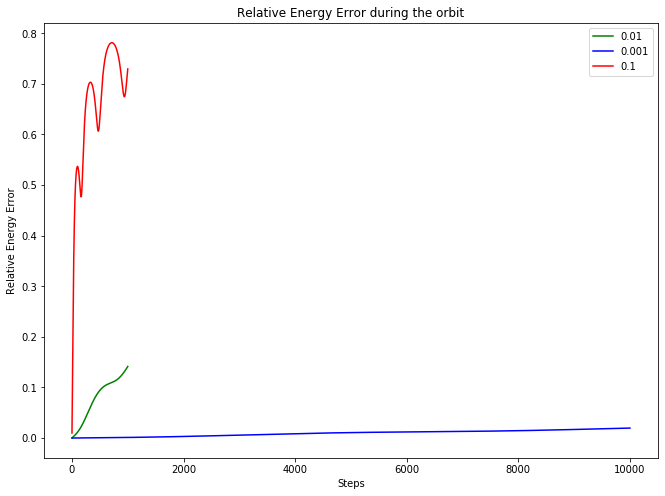

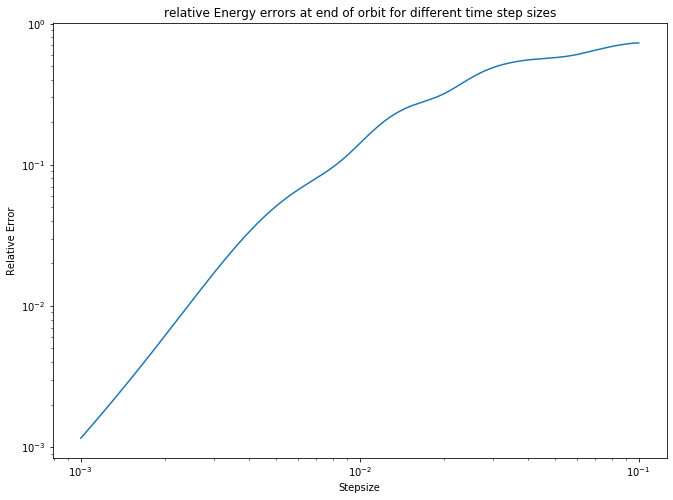

In [5]:
#plot energyerror over number of steps, using the objects used before
plt.figure(figsize=(11,8))
plt.title("Relative Energy Error during the orbit")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(np.linspace(0, A.steps, len(A.rel_Error)), A.rel_Error, label=f"{str(A.h)}", c="green")
plt.plot(np.linspace(0, B.steps, len(B.rel_Error)), B.rel_Error, label=f"{str(B.h)}", c="blue")
plt.plot(np.linspace(0, C.steps, len(C.rel_Error)), C.rel_Error, label=f"{str(C.h)}", c="red")
plt.legend()


#for many orbits with a stepsize in the range from 0.1 to 0.001 the relative energy error at the end of the orbit is calculated
#then its plotted against the size of the time steps, on log scales
delta_t = np.linspace(0.1, 0.001, 1000)
rel_Error = []
for i in range(len(delta_t)):
    A = Euler([1, 0], [0,1], delta_t[i], 1000, threed=False)
    A.calc()
    rel_Error.append(np.abs((A.energies[-1]-A.energies[0])/A.energies[0]))   

plt.figure(figsize=(11,8))
plt.title("relative Energy errors at end of orbit for different time step sizes")
plt.xlabel("Stepsize")
plt.ylabel("Relative Error")
plt.yscale("log")
plt.xscale("log")
plt.plot(delta_t, rel_Error)

## Part2 Leapfrog Integration

hier blabla zu leapfrog einfügen, ich copypaste einfach alles code mässig von oben, bloss das da jetzt die calc_leap function genommen wird


In [6]:
#### 2.1 different ecentricites
blabla die geschwindigkeiten machen das das dingsie ausbricht aus der ellipse

SyntaxError: invalid syntax (<ipython-input-6-5ccb0d1e64ea>, line 2)

In [ ]:


fig=plt.figure(figsize=(9,3))
fig.suptitle("Eulerintegrated Orbits for 3 different ecentricities")

ax1=plt.subplot(1,3,1)
ax1.set_title("v0= (0,1)")
C = Euler([1, 0], [0,1], 0.01, 1000, threed=False)
C.calc_leap()
ax1.scatter(C.x_location, C.y_location, c="blue", cmap='RdYlGn_r', marker=".")


ax2=plt.subplot(1,3,2)
ax2.set_title("v0=(0,0.5)")
A = Euler([1, 0], [0,0.5], 0.01, 1000, threed=False)
A.calc_leap()
ax2.scatter(A.x_location, A.y_location, c="green", cmap='RdYlGn_r', marker=".")


ax3=plt.subplot(1,3,3)
ax3.set_title("v0= (0,1.5)")
B = Euler([1, 0], [0,1.5], 0.01, 1000, threed=False)
B.calc_leap()
ax3.scatter(B.x_location, B.y_location, c="orange", cmap='RdYlGn_r', marker=".")

plt.tight_layout()

#### 2.2 different step sizes
just as before, we now plot the two body problem for 4 different time step sizes, using v0= (0,1),s0= (1,0)
blabla beschreibung von den neuen tolleren orbits und den unterschiedne zu euler

In [ ]:
fig =plt.figure(figsize=(8,8))
fig.suptitle("Eulerintegrated Orbits for 4 different time step sizes")
ax1=plt.subplot(2,2,1)
ax1.set_title("stepsize: 0.1")
C = Euler([1, 0], [0,1], 0.1, 1000, threed=False)
C.calc_leap()
ax1.scatter(C.x_location, C.y_location, c=C.energies, cmap='RdYlGn_r', marker=".")


ax2=plt.subplot(2,2,2)
ax2.set_title("stepsize: 0.01")
A = Euler([1, 0], [0,1], 0.01, 1000, threed=False)
A.calc_leap()
ax2.scatter(A.x_location, A.y_location, c=A.energies, cmap='RdYlGn_r', marker=".")


ax3=plt.subplot(2,2,3)
ax3.set_title("stepsize: 0.001")
B = Euler([1, 0], [0,1], 0.001, 10000, threed=False)
B.calc_leap()
ax3.scatter(B.x_location, B.y_location, c=B.energies, cmap='RdYlGn_r', marker=".")

ax4 =plt.subplot(2,2,4)
ax4.set_title("stepsize: 0.0001")
D = Euler([1, 0], [0,1], 0.0001, 100000, threed=False)
D.calc_leap()
ax4.scatter(D.x_location, D.y_location, c=D.energies, cmap='RdYlGn_r', marker=".")





blabla schau wie toll es ausieht wenn der fehler sich immer wieder korrigiert, beschreibung von den unteren diagrammen


In [ ]:
plt.figure(figsize=(11,8))
plt.title("Relative Energy Error during the orbit")
plt.ylabel("Relative Energy Error")
plt.xlabel("Steps")
plt.plot(np.linspace(0, A.steps, len(A.rel_Error)), A.rel_Error, label=f"{str(A.h)}", c="green")
plt.plot(np.linspace(0, B.steps, len(B.rel_Error)), B.rel_Error, label=f"{str(B.h)}", c="blue")
plt.plot(np.linspace(0, C.steps, len(C.rel_Error)), C.rel_Error, label=f"{str(C.h)}", c="red")
plt.legend()


#for many orbits with a stepsize in the range from 0.1 to 0.001 the relative energy error at the end of the orbit is calculated
#then its plotted against the size of the time steps, on log scales
delta_t = np.linspace(0.1, 0.001, 1000)
rel_Error = []
for i in range(len(delta_t)):
    A = Euler([1, 0], [0,1], delta_t[i], 1000, threed=False)
    A.calc_leap()
    rel_Error.append(np.abs((A.energies[-1]-A.energies[0])/A.energies[0]))   

plt.figure(figsize=(11,8))
plt.title("relative Energy errors at end of orbit for different time step sizes")
plt.xlabel("Stepsize")
plt.ylabel("Relative Error")
plt.yscale("log")
plt.xscale("log")
plt.plot(delta_t, rel_Error)

wjhihjcvi {{ rel_Error }}